In [1]:
import networkx as nx
import pandas as pd
import random
import math
import csv
import datetime
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import multiprocessing as mp
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import numpy as np
from sklearn import linear_model
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression

In [3]:
import numpy as np
import pandas as pd
import os
path = os.getcwd()
df = pd.read_table('/home/akarsh/Documents/fall_2020_course_documents/pattern_recognition/PR_project/facebook_combined.txt', delim_whitespace=True, names=('A','B'),dtype={'A': np.int64,'B': np.int64})#df = pd.read_excel(file_name, sheet_name=None)
df.columns=['Col1','Col2']
#print(list(df.columns.values))
#print(df.columns.name)
x=(list(df.columns.values))
print(x)
print("___________--")




c=df
c.head()

a=c.groupby('Col1').count()
print(a)
print("aaa")
x=a.nlargest(100,['Col2'])
print(x)
#y=x.index.values
x['A'] = x.index
print(x['Col2'])
x = x[['A','Col2']]
print(list(x.columns.values))
np.savetxt(path+'\influencer.txt', x.values, fmt='%d', delimiter='\t')#c= pandas.write_table('C:\\Users\\priya\\OneDrive\\Desktop\\Friends Reccomendation\\Friends-Recommender-In-Social-Network-master\\influencer.txt', delim_whitespace=True, names=('A', 'B'),dtype={'A': np.int64, 'B': np.int64})

['Col1', 'Col2']
___________--
      Col2
Col1      
0      347
1       16
2        9
3       16
4        9
5       12
6        5
7       19
8        7
9       55
10       9
13      30
14      14
16       8
17      12
19      14
20      12
21      62
22       9
23      16
24      15
25      65
26      62
27       4
28      11
29      11
30      15
31      19
32       5
33       1
...    ...
3991     1
3992     2
3993     3
3994     8
3995     5
3996     2
3997     7
3998     9
3999     2
4000     5
4001     1
4002     4
4003     3
4004     6
4006     1
4007     2
4009     3
4011     1
4013     3
4014     6
4016     1
4017     3
4018     2
4019     2
4020     5
4021     2
4023     4
4026     1
4027     3
4031     1

[3663 rows x 1 columns]
aaa
      Col2
Col1      
107   1043
1684   778
1912   748
3437   542
0      347
348    225
1941   215
1985   207
483    191
1917   189
1943   187
1938   185
1983   185
1946   183
1993   183
1962   179
2047   174
686    170
1086   168
1971   165
1979 

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


In [4]:
def CommonNeighbors(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    return len(u_neighbors.intersection(v_neighbors))
def common_neighbors(g, edges):
    result = []
    for edge in edges:
        node_one, node_two = edge[0], edge[1]
        num_common_neighbors = 0
        try:
            neighbors_one, neighbors_two = g.neighbors(node_one), g.neighbors(node_two)
            for neighbor in neighbors_one:
                if neighbor in neighbors_two:
                    num_common_neighbors += 1
            result.append((node_one, node_two, num_common_neighbors))
        except:
            pass
    return result

In [5]:
def AdamicAdar(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    aa = 0
    for i in u_neighbors.intersection(v_neighbors):
        aa += 1 / math.log(len(g.neighbors(i)))
    return aa

In [6]:
def ResourceAllocation(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    ra = 0
    for i in u_neighbors.intersection(v_neighbors):
        ra += 1 / float(len(g.neighbors(i)))
    return ra

In [7]:
def JaccardCoefficent(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    return len(u_neighbors.intersection(v_neighbors)) / float(len(u_neighbors.union(v_neighbors)))

In [8]:
def PreferentialAttachment(u, v, g):
    return len(g.neighbors(u))*len(g.neighbors(v))

In [9]:
def custom_feature(u, v, g):
    u_neighbors = set(g.neighbors(u))
    v_neighbors = set(g.neighbors(v))
    print(u_neighbors)
    print(v_neighbors)

In [10]:
def AllFeatures(u,v,g1, g2):
    '''
    the change of features in two consecutive sub graphs
    '''
    try:
        cn = CommonNeighbors(u, v, g2)
        aa = AdamicAdar(u, v, g2)
        ra = ResourceAllocation(u, v, g2)
        jc = JaccardCoefficent(u, v, g2)
        pa = PreferentialAttachment(u, v, g2)

        delta_cn = cn - CommonNeighbors(u, v, g1)
        delta_aa = aa - AdamicAdar(u, v, g1)
        delta_ra = ra - ResourceAllocation(u, v, g1)
        delta_jc = jc - JaccardCoefficent(u, v, g1)
        delta_pa = pa - PreferentialAttachment(u, v, g1)
        return {"cn":cn, "aa": aa, "ra":ra, "jc":jc, "pa":pa,
            "delta_cn": delta_cn, "delta_aa": delta_aa, "delta_ra": delta_ra,
             "delta_jc": delta_jc, "delta_pa": delta_pa}
    except:
        pass

In [11]:
feature_set = [common_neighbors,
                   nx.resource_allocation_index,
                   nx.jaccard_coefficient,
                   nx.adamic_adar_index,
                   nx.preferential_attachment
                   ]

In [12]:
def produce_fake_edge(g, neg_g,num_test_edges):
    i = 0
    while i < num_test_edges:
        edge = random.sample(g.nodes(), 2)
        try:
            shortest_path = nx.shortest_path_length(g,source=edge[0],target=edge[1])
            if shortest_path >= 2:
                neg_g.add_edge(edge[0],edge[1], positive="False")
                i += 1
        except:
            pass

In [13]:
def create_graph_from_file(filename):
    print("----------------build graph--------------------")
    f = open(filename, "rb")
    g = nx.read_edgelist(f)
    return g

In [14]:
def sample_extraction(g, pos_num, neg_num, neg_mode, neg_distance=2, delete=1):
    """

    :param g:  the graph
    :param pos_num: the number of positive samples
    :param neg_num: the number of negative samples
    :param neg_distance: the distance between two nodes in negative samples
    :param delete: if delete ==0, don't delete positive edges from graph
    :return: pos_sample is a list of positive edges, neg_sample is a list of negative edges
    """

    print("----------------extract positive samples--------------------")
    # randomly select pos_num as test edges
    pos_sample = random.sample(g.edges(), pos_num)
    sample_g = nx.Graph()
    sample_g.add_edges_from(pos_sample, positive="True")
    nx.write_edgelist(sample_g, "sample_positive_" +str(pos_num)+ ".txt", data=['positive'])

    # adding non-existing edges
    print("----------------extract negative samples--------------------")
    i = 0
    neg_g = nx.Graph()
    produce_fake_edge(g,neg_g,neg_num)
    nx.write_edgelist(neg_g, "sample_negative_" +str(neg_num)+ ".txt", data=["positive"])
    neg_sample = neg_g.edges()
    neg_g.add_edges_from(pos_sample,positive="True")
    nx.write_edgelist(neg_g, "sample_combine_" +str(pos_num + neg_num)+ ".txt", data=["positive"])

    # remove the positive sample edges, the rest is the training set
    if delete == 0:
        return pos_sample, neg_sample
    else:
        g.remove_edges_from(pos_sample)
        nx.write_edgelist(g, "training.txt", data=False)

        return pos_sample, neg_sample

In [15]:
def feature_extraction(g, pos_sample, neg_sample, feature_name, model="single", combine_num=5):

    data = []
    if model == "single":
        print ("-----extract feature:", feature_name.__name__, "----------")
        preds = feature_name(g, pos_sample)
        feature = [feature_name.__name__] + [i[2] for i in preds]
        label = ["label"] + ["Pos" for i in range(len(feature))]
        preds = feature_name(g, neg_sample)
        feature1 = [i[2] for i in preds]
        feature = feature + feature1
        label = label + ["Neg" for i in range(len(feature1))]
        data = [feature, label]
        data = transpose(data)
        print("----------write the feature to file---------------")
        write_data_to_file(data, "features_" + model + "_" + feature_name.__name__ + ".csv")
    else:
        label = ["label"] + ["1" for i in range(len(pos_sample))] + ["0" for i in range(len(neg_sample))]
        for j in feature_name:
            print ("-----extract feature:", j.__name__, "----------")
            preds = j(g, pos_sample)

            feature = [j.__name__] + [i[2] for i in preds]
            preds = j(g, neg_sample)
            feature = feature + [i[2] for i in preds]
            data.append(feature)

        data.append(label)
        data = transpose(data)
        print("----------write the features to file---------------")
        write_data_to_file(data, "features_" + model + "_" + str(combine_num) + ".csv")
    return data


def write_data_to_file(data, filename):
    csvfile = open(filename, "w")
    writer = csv.writer(csvfile)
    for i in data:
        writer.writerow(i)
    csvfile.close()


def transpose(data):
    return [list(i) for i in zip(*data)]

In [16]:
def main(filename="facebook_combined.txt", pos_num=0.1, neg_num=0.1, model="combined", combine_num=1,
         feature_name=common_neighbors, neg_mode="hard"):
    if combine_num==2:
        pos_num=0.008;
        neg_num=0.008;
    g = create_graph_from_file(filename)
    num_edges = g.number_of_edges()
    pos_num = int(num_edges * pos_num)
    neg_num = int(num_edges * neg_num)
    pos_sample, neg_sample = sample_extraction(g, pos_num, neg_num,neg_mode)
    train_data = feature_extraction(g, pos_sample, neg_sample, feature_name, model, combine_num)


In [17]:
#______________________Entry Point________________________
#Fn: Name of data set you want to run this code for, and cn is a integer for that dataset(any integer will work but different for each dataset)
#By default it is set to Twitter Data Set
#The project was run using Facebook and Twitter dataset but it works with any social network dataset from http://snap.stanford.edu/data/
#Following Scoring Methods are used to construct feature Set----
#common_neighbors,resource_allocation_index, jaccard_coefficient, adamic_adar_index, preferential_attachment
#SVM ANN and Logistic Regresssion is used for classificaion
fn="facebook_combined.txt";
cn=2;

In [18]:
#Run this line to genrate feature Set
main(filename=fn,model="combined",combine_num=cn, feature_name=feature_set, neg_mode="easy")

----------------build graph--------------------
----------------extract positive samples--------------------
----------------extract negative samples--------------------
('-----extract feature:', 'common_neighbors', '----------')
('-----extract feature:', 'resource_allocation_index', '----------')
('-----extract feature:', 'jaccard_coefficient', '----------')
('-----extract feature:', 'adamic_adar_index', '----------')
('-----extract feature:', 'preferential_attachment', '----------')
----------write the features to file---------------


In [19]:
r=np.loadtxt(open("features_combined_"+str(cn)+".csv", "rb"), delimiter=",", skiprows=1);

In [20]:
l,b=r.shape;

In [21]:
np.random.shuffle(r);

In [22]:
train_l=int(0.8*l)
X_train=r[0:train_l,0:b-1]
Y_train=r[0:train_l,b-1]
X_test=r[train_l:l,0:b-1]
Y_test=r[train_l:l,b-1]
# X_train = normalize(X_train, axis=0, norm='max')
# X_test = normalize(X_test, axis=0, norm='max')
# scaler = StandardScaler()  
# scaler.fit(X_train)  
# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test)  
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [23]:
from sklearn import tree
def DecisionTree_Train(training, training_labels, testing, testing_labels):
#     from sklearn.preprocessing import StandardScaler
#     from sklearn import preprocessing
#     X_scaled = preprocessing.scale(training)
#     scaler = preprocessing.StandardScaler().fit(training)
#     min_max_scaler = preprocessing.MinMaxScaler()
#     training = min_max_scaler.fit_transform(training)
#     testing = min_max_scaler.transform(testing)
    dtree_clf = DecisionTreeClassifier(random_state=1)
    dtree_clf.fit(training, training_labels)
    train_pred = dtree_clf.predict(training)
    train_score = accuracy_score(training_labels, train_pred)
#     start = datetime.datetime.now()
#     clf.fit(training, training_labels)
#     print ("+++++++++ Finishing training the ANN classifier ++++++++++++")
#     result = clf.predict(testing)
    return train_score, dtree_clf
#     print ("Decision accuracy:", accuracy_score(testing_labels, result))
#     #keep the time
#     finish = datetime.datetime.now()
#     print ((finish-start).seconds)

In [24]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest_Train(training, training_labels, testing, testing_labels):
#     from sklearn.preprocessing import StandardScaler
#     from sklearn import preprocessing
#     X_scaled = preprocessing.scale(training)
#     scaler = preprocessing.StandardScaler().fit(training)
#     min_max_scaler = preprocessing.MinMaxScaler()
#     training = min_max_scaler.fit_transform(training)
#     testing = min_max_scaler.transform(testing)
    rFor_clr = RandomForestClassifier(n_estimators = 2000, random_state=1, class_weight = 'balanced_subsample')
#     start = datetime.datetime.now()
    rFor_clr.fit(training, training_labels)
    train_pred = rFor_clr.predict(training)
    train_score = accuracy_score(training_labels, train_pred)
    return train_score, rFor_clr
#     print ("+++++++++ Finishing training the Random Forest classifier ++++++++++++")
#     result = clf.predict(testing)

#     print ("Random Forest accuracy:", accuracy_score(testing_labels, result))
#     #keep the time
#     finish = datetime.datetime.now()
#     print ((finish-start).seconds)

/usr/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
def svm_Train(training, training_labels, testing, testing_labels):
    #Support Vector Machine
    from sklearn.preprocessing import StandardScaler
    from sklearn import preprocessing
    training = normalize(training, axis=0, norm='max')
    testing = normalize(testing, axis=0, norm='max')
    scaler = StandardScaler()  
    scaler.fit(training)  
    training = scaler.transform(training)  
    testing = scaler.transform(testing) 
#     X_scaled = preprocessing.scale(training)
#     scaler = preprocessing.StandardScaler().fit(training)
#     min_max_scaler = preprocessing.MinMaxScaler()
#     training = min_max_scaler.fit_transform(training)
#     testing = min_max_scaler.transform(testing)
    start = datetime.datetime.now()
    svm_clf = svm.SVC(kernel = 'poly', degree = 7, class_weight = 'balanced', max_iter = 10000000, random_state = 10)
    svm_clf.fit(training, training_labels)
    train_pred = svm_clf.predict(training)
    train_score = accuracy_score(training_labels, train_pred)
    return train_score, svm_clf
#train_pred, train_score
svm_Train(X_train,Y_train,X_test,Y_test)

(0.7039007092198581,
 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
   decision_function_shape='ovr', degree=7, gamma='auto', kernel='poly',
   max_iter=10000000, probability=False, random_state=10, shrinking=True,
   tol=0.001, verbose=False))

In [26]:
def logistic_Train(training, training_labels, testing, testing_labels):
    from sklearn.preprocessing import StandardScaler
    from sklearn import preprocessing
#     X_scaled = preprocessing.scale(training)
#     scaler = preprocessing.StandardScaler().fit(training)
#     min_max_scaler = preprocessing.MinMaxScaler()
#     training = min_max_scaler.fit_transform(training)
#     testing = min_max_scaler.transform(testing)
    log_clf = LogisticRegression(random_state=1, solver='saga',multi_class='multinomial', class_weight = 'balanced', max_iter = 1000, warm_start = True).fit(training, training_labels)
#     start = datetime.datetime.now()
    var = log_clf.fit(training, training_labels)
    train_pred = log_clf.predict(training)
    train_score = accuracy_score(training_labels, train_pred)
    return train_score, log_clf
#train_pred, train_score
# logistic_Train(X_train,Y_train,X_test,Y_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
def knn_Train(training, training_labels, testing, testing_labels):
    
    knn_clr = KNeighborsClassifier()
    knn_clr.fit(training, training_labels)
    train_pred = knn_clr.predict(training)
    train_score = accuracy_score(training_labels, train_pred)
    return train_score, knn_clr
knn_Train(X_train,Y_train,X_test,Y_test)

(0.9778368794326241,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'))

In [28]:
from sklearn.naive_bayes import GaussianNB
def naive_Train(training, training_labels, testing, testing_labels):
    naive_clr = GaussianNB()
    naive_clr.fit(training, training_labels)
    train_pred = naive_clr.predict(training)
    train_score = accuracy_score(training_labels, train_pred)
#     test_pred = naive_clr.predict(data)
#     test_score = naive_clr.score(testing, testing_labels)
    return train_score, naive_clr
naive_Train(X_train,Y_train,X_test,Y_test)

(0.949468085106383, GaussianNB(priors=None))

In [29]:
def ANN_Train(training, training_labels, testing, testing_labels):
#     from sklearn.preprocessing import StandardScaler
#     from sklearn import preprocessing
#     X_scaled = preprocessing.scale(training)
#     scaler = preprocessing.StandardScaler().fit(training)
#     min_max_scaler = preprocessing.MinMaxScaler()
#     training = min_max_scaler.fit_transform(training)
#     testing = min_max_scaler.transform(testing)  
    ann_clf = MLPClassifier(solver='lbfgs', alpha=1e-9,hidden_layer_sizes=(15,9), random_state=100, max_iter=100000, warm_start = True)
#     start = datetime.datetime.now()
    ann_clf.fit(training, training_labels)
    train_pred = ann_clf.predict(training)
    train_score = accuracy_score(training_labels, train_pred)
    return train_score, ann_clf
ANN_Train(X_train,Y_train,X_test,Y_test)

(0.9769503546099291,
 MLPClassifier(activation='relu', alpha=1e-09, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(15, 9), learning_rate='constant',
        learning_rate_init=0.001, max_iter=100000, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=100,
        shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=True))

In [44]:
#Ensemble of ANN, Logistic, svm
from scipy import stats
#Get the train-set accuracy scores and the train data fitted classifiers
svm_score, svm_fitted = svm_Train(X_train,Y_train,X_test,Y_test)
log_score, log_fitted = logistic_Train(X_train,Y_train,X_test,Y_test)
ann_score, ann_fitted = ANN_Train(X_train,Y_train,X_test,Y_test)
dtree_score, dtree_fitted = DecisionTree_Train(X_train,Y_train,X_test,Y_test)
rfor_score, rfor_fitted = RandomForest_Train(X_train,Y_train,X_test,Y_test)
knn_score, knn_fitted = knn_Train(X_train,Y_train,X_test,Y_test)
naive_score, naive_fitted = naive_Train(X_train,Y_train,X_test,Y_test)
print("SVM_score:",svm_score)
print("NAIVE_score:",naive_score)
print("ANN_score:",ann_score)
print("LOG_score:",log_score)
training_score = []
training_score.append(float(ann_score))
training_score.append(float(naive_score))
training_score.append(float(svm_score))
training_score.append(float(log_score))

ensemble_score = (5 * float(ann_score) + 5 * float(naive_score) + 3 * float(log_score) ) /13
training_score.append(ensemble_score)
print( "Ensemble_score:",ensemble_score)
pred = []
log_allPred = []
ann_allPred = []
svm_allPred = []
knn_allPred = []
naive_allPred = []
dtree_allPred = []
rfor_allPred = []

for data in X_test:
    data = data.reshape(1, -1)
    #Predict test set with the fited classifers
    svm_pred = svm_fitted.predict(data)
    svm_allPred.append(svm_pred)
    log_pred = log_fitted.predict(data)
    log_allPred.append(log_pred)
    ann_pred = ann_fitted.predict(data)
    ann_allPred.append(ann_pred)
    knn_pred = knn_fitted.predict(data)
    knn_allPred.append(knn_pred)
    naive_pred = naive_fitted.predict(data)
    naive_allPred.append(naive_pred)
    dtree_pred = dtree_fitted.predict(data)
    dtree_allPred.append(dtree_pred)
    rfor_pred = rfor_fitted.predict(data)
    rfor_allPred.append(rfor_pred)
    #pred.append(stats.mode(np.array([int(svm_pred), int(log_pred), int(ann_pred)]))[0][0])
    
    #Weighted Voting -  Ensemble method
    value = (5 * int(ann_pred) + 5 * int(naive_pred)  + 3 * int(log_pred) ) /13
    if value >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

print(accuracy_score(svm_allPred, Y_test))
print(accuracy_score(log_allPred, Y_test))
print(accuracy_score(ann_allPred, Y_test))
print(accuracy_score(knn_allPred, Y_test))
print(accuracy_score(naive_allPred, Y_test))
print(accuracy_score(dtree_allPred, Y_test))
print(accuracy_score(rfor_allPred, Y_test))
print(accuracy_score(pred, Y_test))
testing_score = []
testing_score.append(accuracy_score(ann_allPred, Y_test))
testing_score.append(accuracy_score(naive_allPred, Y_test))
testing_score.append(accuracy_score(svm_allPred, Y_test))
testing_score.append(accuracy_score(log_allPred, Y_test))
testing_score.append(accuracy_score(pred, Y_test))

('SVM_score:', 0.7039007092198581)
('NAIVE_score:', 0.949468085106383)
('ANN_score:', 0.9769503546099291)
('LOG_score:', 0.8687943262411347)
('Ensemble_score:', 0.9414211674849973)
0.5070921985815603
0.8581560283687943
0.9716312056737588
0.975177304964539
0.9539007092198581
0.9680851063829787
0.9716312056737588
0.8617021276595744


In [45]:
training_score.append(dtree_score)
training_score.append(rfor_score)
training_score.append(knn_score)
testing_score.append(accuracy_score(dtree_allPred, Y_test))
testing_score.append(accuracy_score(rfor_allPred, Y_test))
testing_score.append(accuracy_score(knn_allPred, Y_test))

[0.9769503546099291, 0.949468085106383, 0.7039007092198581, 0.8687943262411347, 0.9414211674849973, 1.0, 1.0, 0.9778368794326241]
[0.9716312056737588, 0.9539007092198581, 0.5070921985815603, 0.8581560283687943, 0.8617021276595744, 0.9680851063829787, 0.9716312056737588, 0.975177304964539]


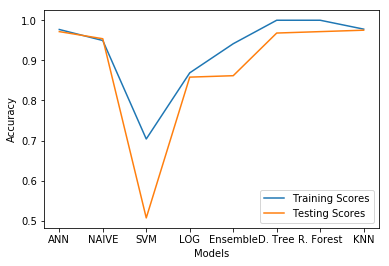

In [47]:
import matplotlib.pyplot as plt
y_axis = np.arange(0, 101)
labels = ['ANN', 'NAIVE', 'SVM', 'LOG', 'Ensemble', 'D. Tree', 'R. Forest', 'KNN']
x = np.arange(len(labels))
width = 0.5
print(training_score)
print(testing_score)
plt.plot(training_score, label = 'Training Scores')
plt.plot(testing_score, label = 'Testing Scores')
# plt.bar(x-width/2, training_score, width = width, label = 'Training Scores')
# plt.bar(x+width/2, testing_score,width = width, label = 'Testing Scores')
plt.xticks(x, labels)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()